# NTSB Aviation Accident Analysis

#### **Overview**

The **NTSB Aviation Accident Database** contains comprehensive records of civil aviation accidents and selected incidents that have occurred in the United States, its territories, and international waters since 1962. The dataset includes both preliminary and final reports, with factual details being updated as investigations unfold. Final reports provide insights into the causes of each accident and the corrective actions recommended by the **National Transportation Safety Board (NTSB)**.

#### **Data Source**

The database features reports on aviation incidents and accidents. Preliminary reports are usually made available within days of the event, while full narrative descriptions may not be available for accidents before 1993, cases under investigation, or where the NTSB was not the primary investigative body.

#### **Acknowledgements**

The NTSB continuously updates the database, offering an evolving perspective on air travel safety. As investigations are completed, preliminary reports are replaced with final findings, ensuring the data is accurate and up to date.



# Business Problem

The company is venturing into the aviation industry by purchasing aircraft for commercial and private use. However, the company lacks knowledge of the risks associated with different aircraft models. The objective of this analysis is to identify the aircraft with the lowest operational risks by evaluating factors such as safety records, maintenance costs, and overall performance. The findings will help the company make informed decisions on which aircraft to purchase, mitigating risk as they expand into this new sector.

# Objectives

1. **Which aircraft makes and models have the lowest incidence of severe injuries or fatalities?**  
   - Utilize `Make`, `Model`, `Total.Fatal.Injuries`, and `Total.Serious.Injuries` to assess safety performance by aircraft type.

2. **How does the purpose of the flight correlate with the severity of injuries and aircraft damage?**  
   - Analyze the `Purpose.of.flight`, `Injury.Severity`, and `Aircraft.damage` columns to identify higher-risk flight purposes.

3. **What weather conditions are associated with the most or least severe accidents?**  
   - Use `Weather.Condition` and severity metrics (`Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured`) to determine the impact of weather on safety.

4. **Does the number of engines affect the severity of injuries or likelihood of damage?**  
   - Explore the `Number.of.Engines`, `Injury.Severity`, and `Aircraft.damage` columns to evaluate how engine configuration influences risks.

5. **Are there specific countries or locations with higher rates of severe accidents?**  
   - Use `Location`, `Country`, and injury columns to identify geographical hotspots or safer regions for operations.

These questions provide actionable insights into selecting safer aircraft and optimizing flight operations.

# Data Understanding

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [106]:
df = pd.read_csv('/content/AviationData.csv', encoding='latin1')
codes = pd.read_csv('/content/USState_Codes.csv')


<ipython-input-106-3a982e75f25f>:1: DtypeWarning:

Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.



In [107]:
df.shape

(88889, 31)

In [108]:
codes.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

### Data Understanding Summary

The dataset contains 31 columns with various attributes related to aviation accidents. Here's a brief overview of each column:

1. **Event.Id** (object) – A unique identifier for each event. No missing values.
2. **Investigation.Type** (object) – Type of investigation conducted. No missing values.
3. **Accident.Number** (object) – A unique identifier for each accident. No missing values.
4. **Event.Date** (object) – The date when the event occurred. No missing values.
5. **Location** (object) – The location of the accident. Some missing values (52 entries).
6. **Country** (object) – The country where the accident occurred. 226 missing entries.
7. **Latitude** (object) – Latitude of the accident location. 54,507 missing values.
8. **Longitude** (object) – Longitude of the accident location. 54,516 missing values.
9. **Airport.Code** (object) – The airport code where the accident occurred. 38,757 missing values.
10. **Airport.Name** (object) – The airport name where the accident occurred. 36,185 missing values.
11. **Injury.Severity** (object) – Severity of injuries in the accident. 1,000 missing values.
12. **Aircraft.damage** (object) – Level of damage to the aircraft. 3,194 missing values.
13. **Aircraft.Category** (object) – The category of the aircraft. 56,602 missing values.
14. **Registration.Number** (object) – The aircraft registration number. 13,382 missing values.
15. **Make** (object) – The manufacturer of the aircraft. 63 missing values.
16. **Model** (object) – The model of the aircraft. 92 missing values.
17. **Amateur.Built** (object) – Whether the aircraft was amateur-built. 102 missing values.
18. **Number.of.Engines** (float64) – The number of engines on the aircraft. 6,084 missing values.
19. **Engine.Type** (object) – The type of engine used in the aircraft. 7,096 missing values.
20. **FAR.Description** (object) – A description of Federal Aviation Regulations applicable to the event. 56,866 missing values.
21. **Schedule** (object) – Whether the flight was scheduled. 75,307 missing values.
22. **Purpose.of.flight** (object) – The purpose of the flight. 6,192 missing values.
23. **Air.carrier** (object) – The airline carrier for the flight. 72,241 missing values.
24. **Total.Fatal.Injuries** (float64) – The total number of fatal injuries. 11,401 missing values.
25. **Total.Serious.Injuries** (float64) – The total number of serious injuries. 12,510 missing values.
26. **Total.Minor.Injuries** (float64) – The total number of minor injuries. 10,433 missing values.
27. **Total.Uninjured** (float64) – The total number of uninjured people. 3,912 missing values.
28. **Weather.Condition** (object) – The weather condition at the time of the event. 4,492 missing values.
29. **Broad.phase.of.flight** (object) – The phase of the flight during which the accident occurred. 26,165 missing values.
30. **Report.Status** (object) – The status of the report. 6,384 missing values.
31. **Publication.Date** (object) – The date the report was published. 13,771 missing values.



In [110]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,37,-82,NaN,NaN,...,Personal,NaN,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1,2,NaN,0,VMC,Approach,Probable Cause,16-04-1980


In [111]:
# Summary statistics of numeric columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805,77488,76379,76956,82977
mean,1,1,0,0,5
std,0,5,2,2,28
min,0,0,0,0,0
25%,1,0,0,0,0
50%,1,0,0,0,1
75%,1,0,0,0,2
max,8,349,161,380,699


In [112]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [ ]:
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50132 non-null  object        
 9   Airport.Name            52704 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

# Data Preparation


In [115]:
# Checking the number of missing values in each column
df.isna().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,52
Country,226
Latitude,54507
Longitude,54516
Airport.Code,38757
Airport.Name,36185


In [116]:
# I am going to drop columns that have roughly more than 25% of their data missing
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description',
                   'Schedule', 'Air.carrier']

df_clean = df.drop(columns=columns_to_drop)

In [117]:
#I think there are many columns which are not important for my analysis. I drop these columns for easier handling of data
# and clearer analysis
more_columns_to_drop = ['Accident.Number', 'Registration.Number', 'Amateur.Built',
                   'Publication.Date', 'Publication.Date', 'Report.Status']
df_clean = df_clean.drop(columns=more_columns_to_drop)

In [118]:
df_clean.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight'],
      dtype='object')

#### Feature engineering

In [119]:
# Extract the last two letters from the 'Location' column
df_clean['State_Abbreviation'] = df_clean['Location'].str[-2:]

# Merge with the state DataFrame to get the state name
df_clean = df_clean.merge(codes, left_on='State_Abbreviation', right_on='Abbreviation', how='left')



In [120]:
df_clean.head(1)

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,State_Abbreviation,US_State,Abbreviation
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,1,...,Personal,2,0,0,0,UNK,Cruise,ID,Idaho,ID


In [ ]:
# Extract fatality numbers from Injury.Severity
df_clean['Fatality'] = df_clean['Injury.Severity'].str.extract(r'\((\d+)\)')

# Fill Fatality with the original column where no numbers were extracted
df_clean['Fatality'].fillna(df_clean['Injury.Severity'], inplace=True)

# Replace categorical severity descriptions with numeric values
severity_mapping = {'Non-Fatal': 0, 'Minor': 0, 'Serious': 0, 'Incident': 0, 'Unavailable': np.nan}
df_clean['Fatality'].replace(severity_mapping, inplace=True)

# Extract numeric part again, ensuring any residual strings like 'Fatal(2)' are cleaned
df_clean['Fatality'] = df_clean['Fatality'].apply(lambda x: re.sub(r'\D', '', str(x)) if pd.notna(x) else np.nan)

# Convert to numeric and handle NaN
df_clean['Fatality'] = pd.to_numeric(df_clean['Fatality'], errors='coerce')

# Set display format for floats
pd.options.display.float_format = '{:.0f}'.format


In [122]:
# My Fatality column with more accurate representation of Fatality counts has been created
df_clean['Fatality'].value_counts()

,count
Fatality,
0,69967
1,6167
2,3711
3,1147
4,812
...,...
88,1
156,1
60,1


In [123]:
# changing date type to the appropriate format and creating a column for seasons
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'], format='%Y-%m-%d')
df_clean['Month'] = df_clean['Event.Date'].dt.month
seasons = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

df_clean['Season'] = df_clean['Month'].map(seasons)

In [124]:
# I am going to create more new columns out of Date columns for future analysis and visualisations
df_clean['Year'] = df_clean['Event.Date'].dt.year

In [125]:
df_clean['Country'].value_counts()

,count
Country,
United States,82248
Brazil,374
Canada,359
Mexico,358
United Kingdom,344
...,...
Seychelles,1
Palau,1
Libya,1


In [126]:
# due to the high number of aviation accidents in the USA alone, we can analyze for the USA initially for a cleaner analysis
df_us = df_us = df_clean[df_clean['Country'] == 'United States']
df_us.reset_index(drop=True, inplace=True)

In [ ]:
valid_state_codes = list(codes['Abbreviation'].unique())

def extract_city_state(location):
    if pd.notna(location):
        location = location.strip()
        last_two_chars = location[-2:].upper()
        if last_two_chars in valid_state_codes:
            return location[:-3].strip(), last_two_chars
        else:
            return location, "Not Applicable" # Some accidents have not happend in a particular state
    else:
        return np.nan, np.nan

df_us[['City', 'State']] = df_us['Location'].apply(extract_city_state).apply(pd.Series)

In [ ]:
# getting rid of trailing commas in City column
df_us['City'] = df_us['City'].str.rstrip(',')

In [ ]:
# having devided Location and Date columns, now we can drop these as well
df_us.drop(columns=['Event.Date', 'Location'], inplace=True)

In [ ]:
df_us['Fatality'] = pd.to_numeric(df_us['Fatality'], errors='coerce')

# Data Analysis

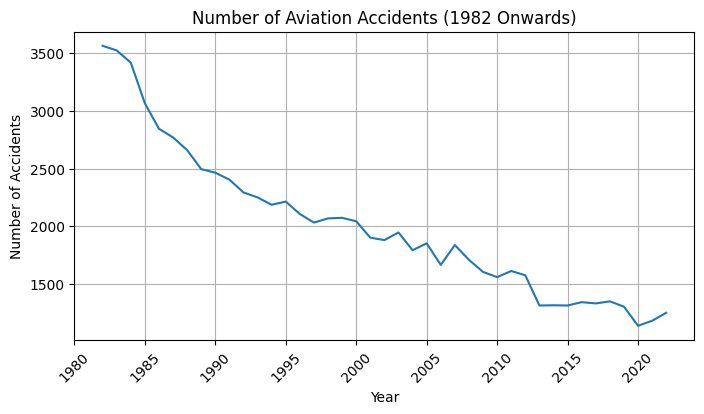

In [131]:
# Let's have a look at the line plot of US aviation accidents over years. I noticed that there are very little
# data about years before 1982. So I limited the plot from 1982 onwards

df_us_filtered = df_us[df_us['Year'] >= 1982]

accidents_by_year = df_us_filtered['Year'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.plot(accidents_by_year.index, accidents_by_year.values, linestyle='-')
plt.title('Number of Aviation Accidents (1982 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
# There has been a dramatic decrease in the number of accidents since 1982 which suggest improvements
# in aviation safety, regulatory measures, technology, training, and overall risk management within the aviation industry.

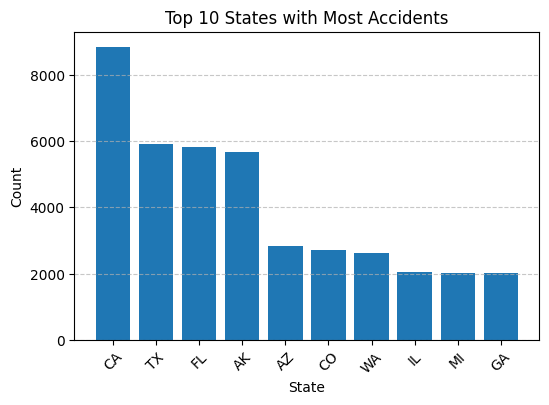

In [132]:
# Let's have a look at top ten states with most accidents
top_10_states = df_us['State'].value_counts().head(10)



plt.figure(figsize=(6, 4))
bars = plt.bar(top_10_states.index, top_10_states.values)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 States with Most Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# California, Texas and Florida have most aviation accidents

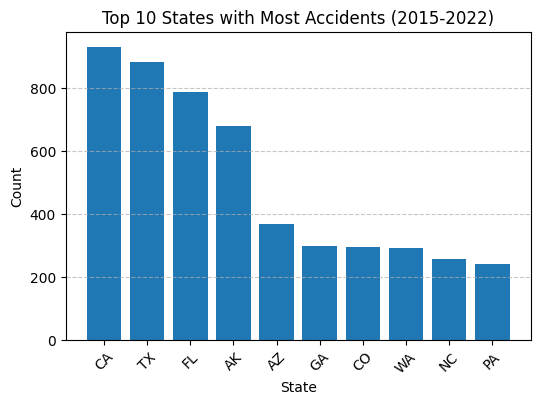

In [133]:
# Rate of accidents for top 5 states are similar in more recent years

filtered_years = df_us[(df_us['Year'] >= 2015) & (df_us['Year'] <= 2022)]


top_10_states = filtered_years['State'].value_counts().head(10)



plt.figure(figsize=(6, 4))
bars = plt.bar(top_10_states.index, top_10_states.values)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 States with Most Accidents (2015-2022)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [134]:
import plotly.express as px

# Prepare data
state_counts = df_us['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Create the choropleth map
fig = px.choropleth(
    state_counts,
    locations="State",
    locationmode="USA-states",
    color="Count",
    scope="usa",
    title="Distribution of Aviation Accidents Around the US",
    color_continuous_scale='Reds',
)

# Set the figure size
fig.update_layout(
    width=800,  # Set the width of the figure
    height=600  # Set the height of the figure
)

# Show the figure
fig.show()


<ipython-input-135-ec17c1947cde>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




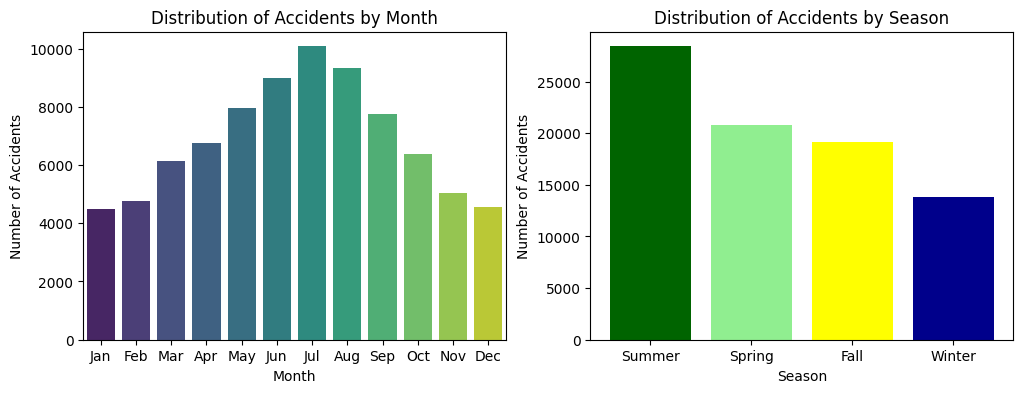

In [135]:
# Plot distribution of accidents by months and seasons

fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.countplot(data=df_us, x='Month', palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Accidents by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Accidents')


month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(month_order)


season_colors = {
    'Winter': 'darkblue',
    'Spring': 'lightgreen',
    'Summer': 'darkgreen',
    'Fall': 'yellow'
}


seasonal_accident_counts = df_us['Season'].value_counts()


axes[1].bar(seasonal_accident_counts.index, seasonal_accident_counts, color=[season_colors.get(season, 'gray') for season in seasonal_accident_counts.index])
axes[1].set_title('Distribution of Accidents by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Number of Accidents')
plt.show()

# Most accidents happen in the summer

In [136]:
# Group by 'Year' and calculate the sum and count of 'Total.Fatal.Injuries'
yearly_stats = df_us[['Year', 'Total.Fatal.Injuries']].groupby('Year').agg(
    total_injuries_sum=('Total.Fatal.Injuries', 'sum'),
    total_injuries_count=('Total.Fatal.Injuries', 'count')
).reset_index()

# Display the grouped result
print(yearly_stats)


    Year  total_injuries_sum  total_injuries_count
0   1948                   2                     1
1   1962                   4                     1
2   1974                   3                     1
3   1977                   2                     1
4   1979                   1                     1
5   1981                   4                     1
6   1982                1557                  3540
7   1983                1259                  3513
8   1984                1198                  3405
9   1985                1346                  3056
10  1986                1157                  2838
11  1987                1192                  2761
12  1988                 892                  2649
13  1989                1060                  2488
14  1990                 944                  2454
15  1991                1033                  2390
16  1992                 977                  2285
17  1993                 805                  2245
18  1994                1064   

In [137]:
# Filter data for the years 2008 to 2022
df_us_filtered = df_us[['Year', 'Total.Fatal.Injuries']][df_us['Year'].between(1982, 2022)]

# Display the filtered data
print(df_us_filtered)


       Year  Total.Fatal.Injuries
7      1982                     0
8      1982                     0
9      1982                     0
10     1982                     0
11     1982                     0
...     ...                   ...
82243  2022                     0
82244  2022                     0
82245  2022                     0
82246  2022                     0
82247  2022                     0

[82241 rows x 2 columns]


In [138]:
# Exploring the rate of fatalities to see what year had the most percentage of deadly accidents

df_us_filtered = df_us.copy()

# I use 1982 onwards because there were only a few accidents for before then
df_us_filtered = df_us_filtered[df_us_filtered['Year'] >= 1982]

yearly_stats_filtered = df_us_filtered.groupby('Year')['Fatality'].agg(['count', 'sum'])


yearly_stats_filtered['Fatality_Percentage'] = (yearly_stats_filtered['sum'] / yearly_stats_filtered['count']) * 100


yearly_stats_filtered['Fatality_Percentage'].fillna(-np.inf, inplace=True)


year_with_highest_percentage = yearly_stats_filtered['Fatality_Percentage'].idxmax()
highest_percentage = yearly_stats_filtered['Fatality_Percentage'].max()





<ipython-input-138-cd0ae788c57b>:14: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





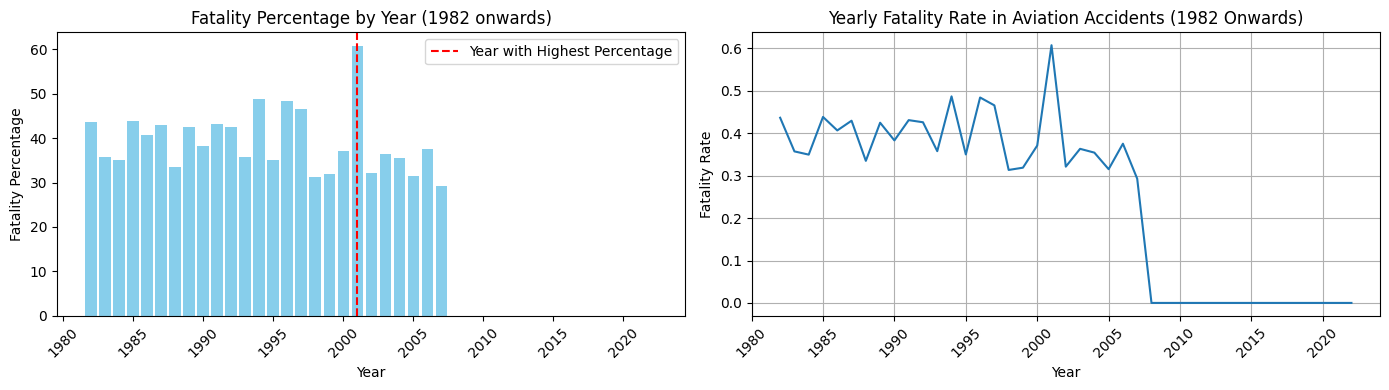

In [139]:
# Here I visualise above calculation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))


ax1.bar(yearly_stats_filtered.index, yearly_stats_filtered['Fatality_Percentage'], color='skyblue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fatality Percentage')
ax1.set_title('Fatality Percentage by Year (1982 onwards)')
ax1.axvline(x=year_with_highest_percentage, color='red', linestyle='--', label='Year with Highest Percentage')
ax1.legend()


yearly_fatality_rate = df_us_filtered.groupby('Year')['Fatality'].sum() / df_us_filtered.groupby('Year')['Fatality'].count()
ax2.plot(yearly_fatality_rate.index, yearly_fatality_rate, linestyle='-')
ax2.set_title('Yearly Fatality Rate in Aviation Accidents (1982 Onwards)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Fatality Rate')
ax2.grid(True)


ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)


plt.tight_layout()


plt.show()

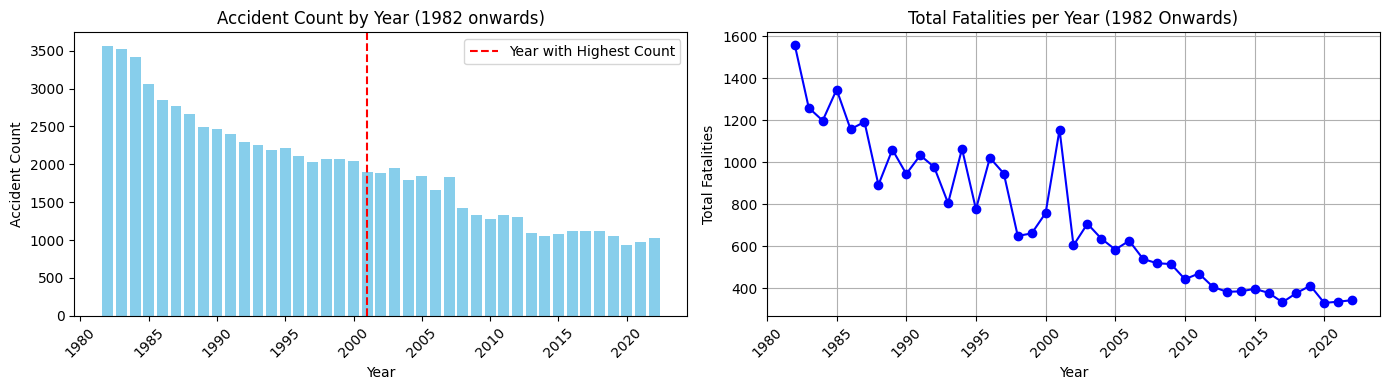

In [140]:
# Here I visualise the above calculation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Plot the count of accidents (Total.Fatal.Injuries) by year
ax1.bar(yearly_stats_filtered.index, yearly_stats_filtered['count'], color='skyblue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Accident Count')
ax1.set_title('Accident Count by Year (1982 onwards)')
ax1.axvline(x=year_with_highest_percentage, color='red', linestyle='--', label='Year with Highest Count')
ax1.legend()

# Plot the total fatalities per year
total_fatalities_per_year = df_us_filtered.groupby('Year')['Total.Fatal.Injuries'].sum()
ax2.plot(total_fatalities_per_year.index, total_fatalities_per_year, linestyle='-', marker='o', color='blue')
ax2.set_title('Total Fatalities per Year (1982 Onwards)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Fatalities')
ax2.grid(True)

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [141]:
# I want to create a new column to catagorize injury types and see what portion of accidents reulst in
# loss of life or serious injury

def categorize_injury_severity(severity):
    if pd.isna(severity):
        return severity
    elif "Non-Fatal" in severity:
        return "Non-Fatal"
    elif "Fatal" in severity or "Serious" in severity:
        return "Fatal/Serious"
    elif "Minor" in severity or "Incident" in severity:
        return "Minor"
    else:
        return severity


df_us['Category'] = df_us['Injury.Severity'].apply(categorize_injury_severity)


<ipython-input-141-567416feb7b2>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# I replace the 'Unavailable' in the category column with NaN
df_us['Category'] = df_us['Category'].replace("Unavailable", np.nan)

In [ ]:
# I put a more suitable name for this column
df_us.rename(columns={'Category': 'Severity_Category'}, inplace=True)

In [ ]:
# I want to have only 2 categories in this column
df_us['Severity_Category'] = df_us['Severity_Category'].replace("Non-Fatal", "Minor")

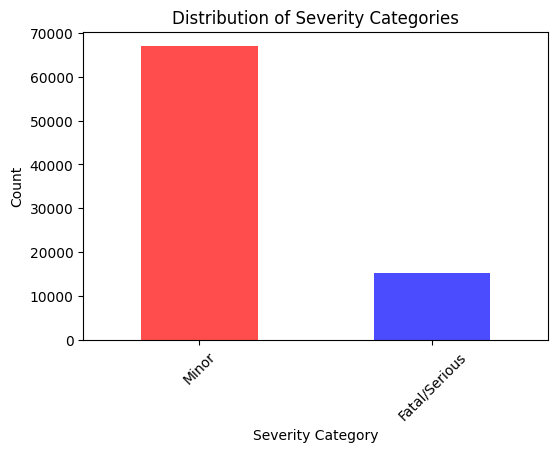

In [145]:
# I plot a bar graph showing distribution of severity categories
severity_counts = df_us['Severity_Category'].value_counts()


plt.figure(figsize=(6, 4))
severity_counts.plot(kind='bar', color=['red', 'blue'], alpha=0.7)
plt.title('Distribution of Severity Categories')
plt.xlabel('Severity Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Most accidents were Non_Fatal or resulted in Minor injuries

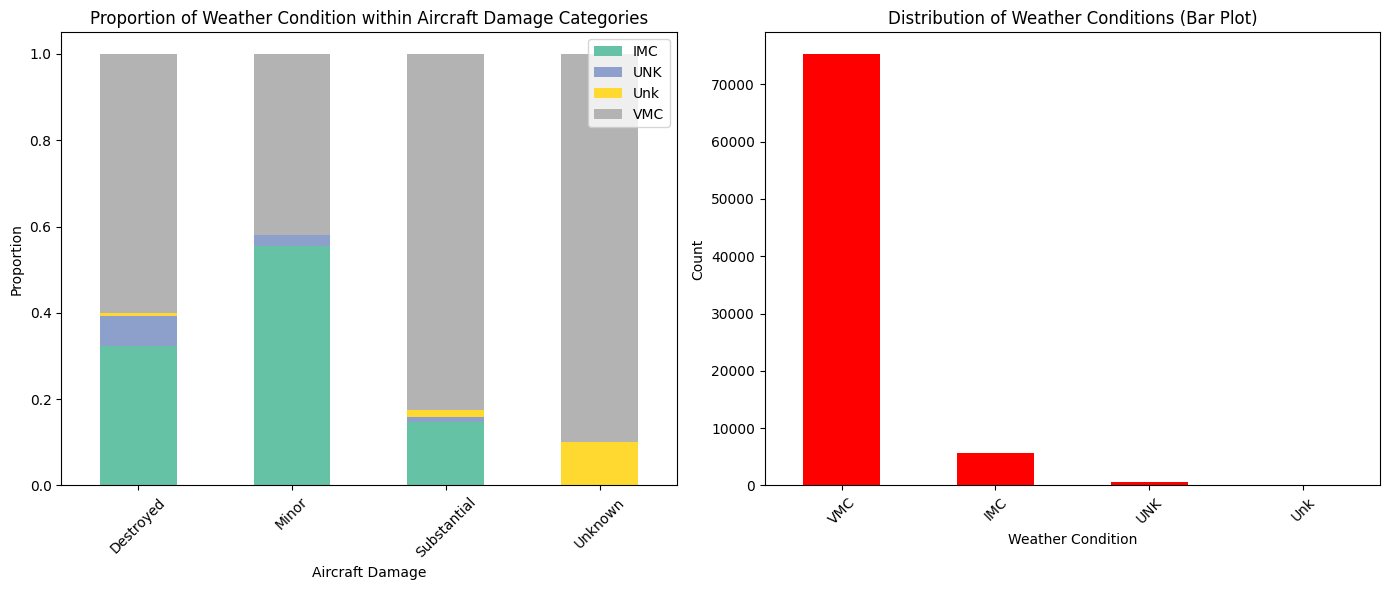

In [146]:
# Calculate the proportion of each Weather.Condition within Aircraft.damage
grouped = df.groupby(['Aircraft.damage', 'Weather.Condition'])['Total.Fatal.Injuries'].sum().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)  # Calculate proportions

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# First subplot: Stacked bar plot for proportion of Weather Condition within Aircraft Damage
proportions.plot(kind='bar', stacked=True, ax=ax1, cmap='Set2')
ax1.set_title('Proportion of Weather Condition within Aircraft Damage Categories')
ax1.set_xlabel('Aircraft Damage')
ax1.set_ylabel('Proportion')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper right')

# Second subplot: Distribution of Weather Conditions (Bar Plot)
weather_counts_updated = df_us['Weather.Condition'].value_counts()
weather_counts_updated.plot(kind='bar', ax=ax2, color='red')
ax2.set_title('Distribution of Weather Conditions (Bar Plot)')
ax2.set_xlabel('Weather Condition')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


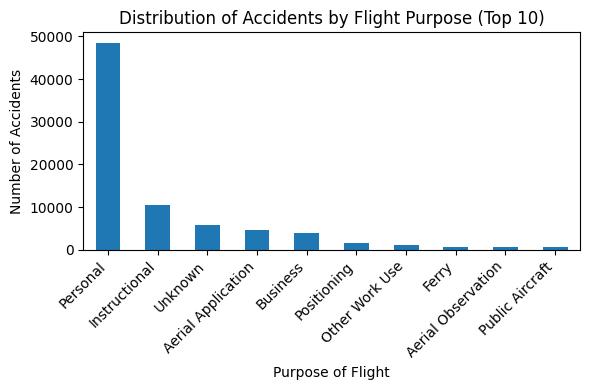

In [147]:
# Exploring the purpose of flights involved in accidents

top_10_purposes = df_us['Purpose.of.flight'].value_counts().nlargest(10).sort_values(ascending=False)


plt.figure(figsize=(6, 4))
top_10_purposes.plot(kind='bar')
plt.title('Distribution of Accidents by Flight Purpose (Top 10)')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [148]:
# Trying to see the relationship between Makes, Models and engine types with accidents
make_model_accident_counts = df_us.groupby(['Make', 'Model']).size().reset_index(name='AccidentCount', drop=False)
make_model_accident_counts = make_model_accident_counts.sort_values(by='AccidentCount', ascending=False)
make_model_accident_counts

,Make,Model,AccidentCount
5095,Cessna,152,2149
5117,Cessna,172,1225
5160,Cessna,172N,980
13939,Piper,PA-28-140,798
5070,Cessna,150,709
...,...,...,...
7795,FIREFLY BALLOONS 2010 INC,FIREFLY 12B-010,1
7796,FIREFLY BALLOONS INC,FIREFLY 8,1
7797,"FIREFLY BALLOONS, INC",FIREFLY 10,1
7798,FISHER,CELEBRITY,1


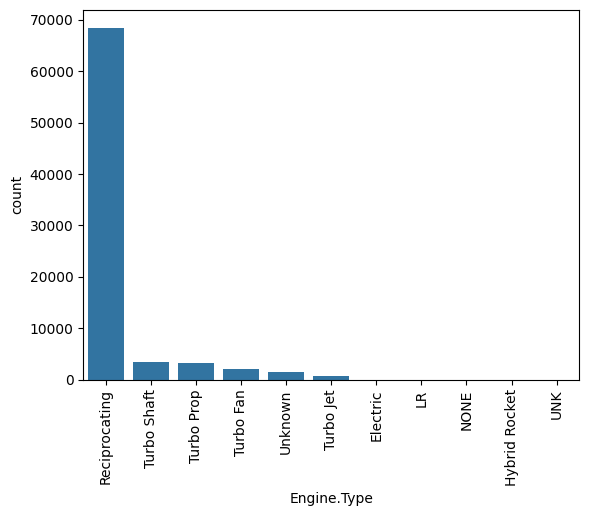

In [149]:
# I plot a count plot showing the different types of engines involved in accidents
sns.countplot(data=df_us,
              x='Engine.Type',
              order=df_us['Engine.Type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


<ipython-input-150-ba26de31777c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-150-ba26de31777c>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




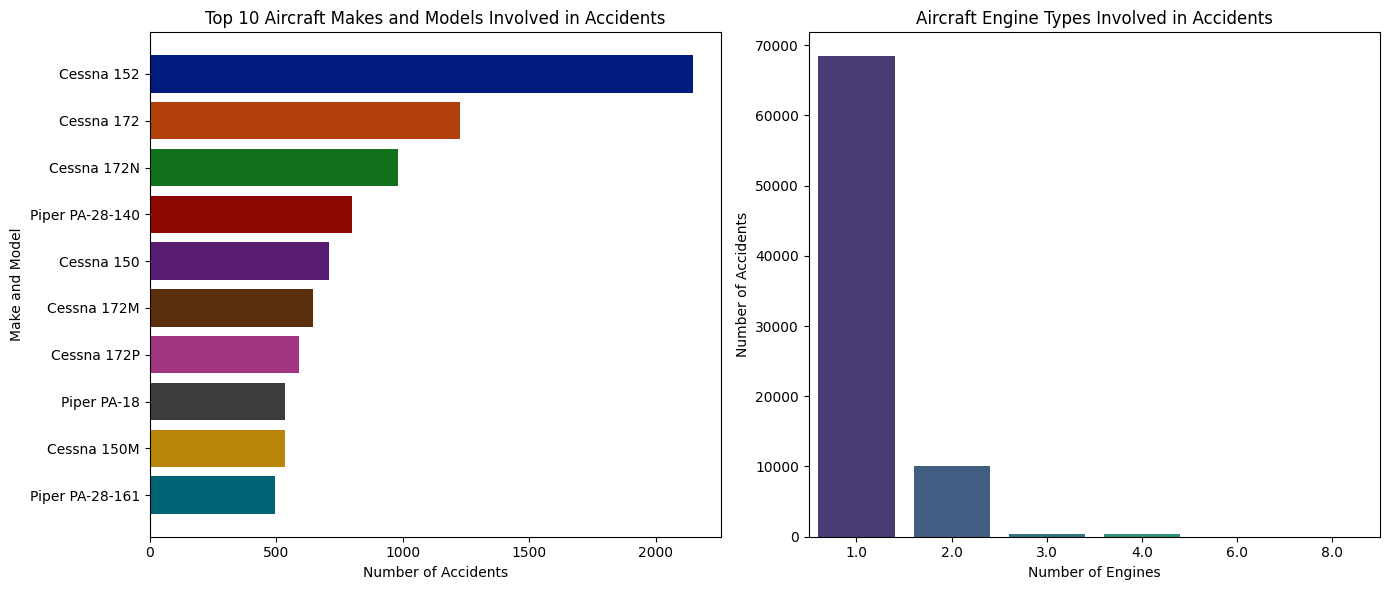

In [150]:

# Ensure 'Number.of.Engines' column is correctly cleaned
df_us['Number.of.Engines'] = df_us['Number.of.Engines'].replace(0.0, np.nan)  # Treat 0 engines as missing

# Create a 'Make' and 'Model' grouped DataFrame to count accidents
make_model_accident_counts = df_us.groupby(['Make', 'Model']).size().reset_index(name='AccidentCount')

# Sort by AccidentCount in descending order and get the top 10
top_10_make_model = make_model_accident_counts.sort_values('AccidentCount', ascending=False).head(10)

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top 10 Make and Model bar plot (horizontal)
colors = sns.color_palette("dark", len(top_10_make_model))
axes[0].barh(top_10_make_model['Make'] + ' ' + top_10_make_model['Model'], top_10_make_model['AccidentCount'], color=colors)
axes[0].set_xlabel('Number of Accidents')
axes[0].set_ylabel('Make and Model')
axes[0].set_title('Top 10 Aircraft Makes and Models Involved in Accidents')
axes[0].invert_yaxis()  # Invert y-axis to have the highest count at the top

# The second subplot can show engine types (you can customize this further)
sns.countplot(data=df_us, x='Number.of.Engines', ax=axes[1], palette='viridis')
axes[1].set_title('Aircraft Engine Types Involved in Accidents')
axes[1].set_xlabel('Number of Engines')
axes[1].set_ylabel('Number of Accidents')

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-151-e5e284acb23e>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




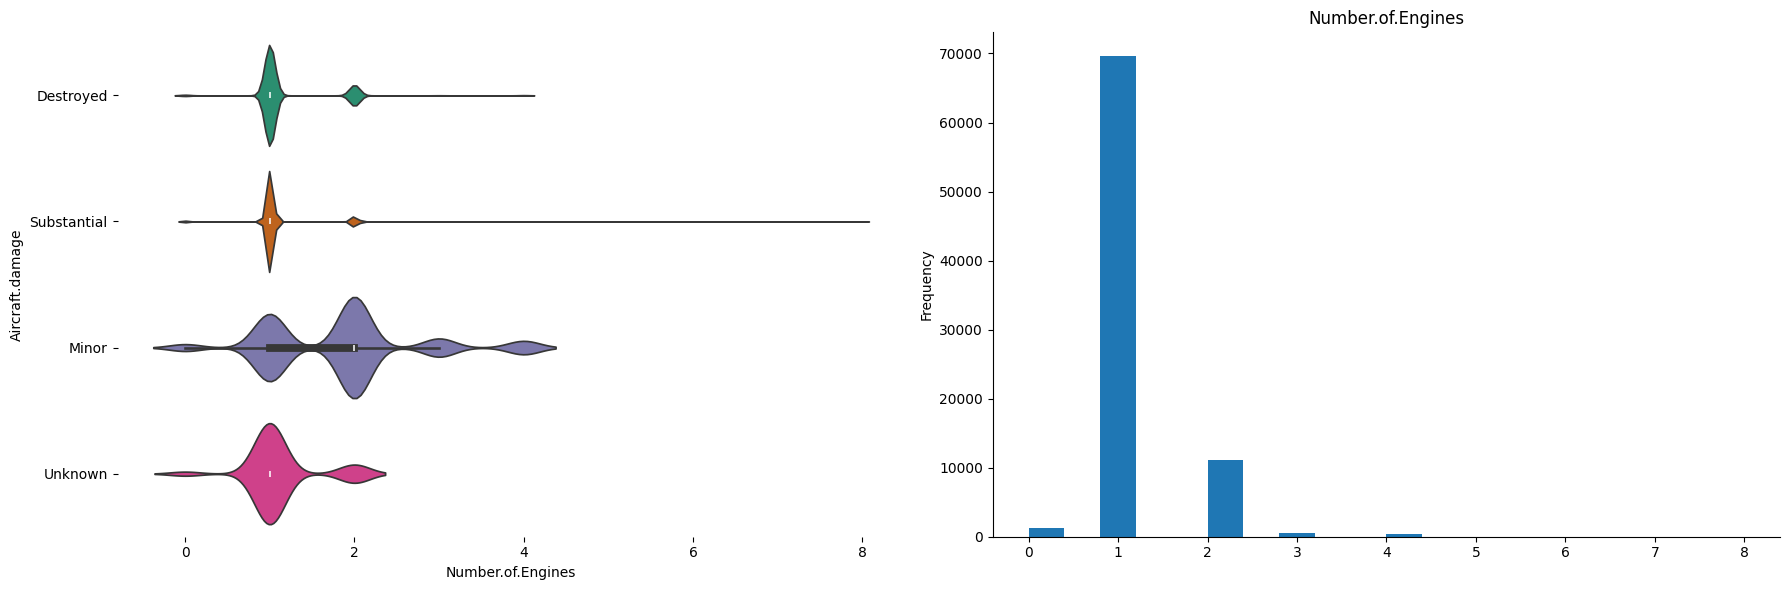

In [151]:
# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns (you can adjust the size as needed)

# Compute the figure size based on the number of unique 'Aircraft.damage' values
sns.violinplot(data=df, x='Number.of.Engines', y='Aircraft.damage', inner='box', palette='Dark2', ax=axes[0])

# Remove the top, right, bottom, and left spines for a cleaner look
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[0])

# Add histogram for 'Number.of.Engines' in the second subplot
df['Number.of.Engines'].plot(kind='hist', bins=20, title='Number.of.Engines', ax=axes[1])

# Remove the top and right spines of the histogram
axes[1].spines[['top', 'right']].set_visible(False)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

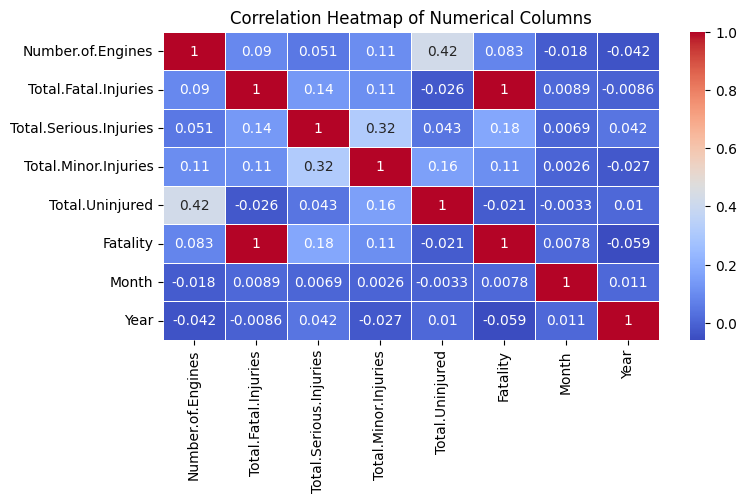

In [152]:
# A correlation heatmap of numerical values
numerical_data = df_us.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# There are mostly strong negative and occasionally weak negative correlation between numerical columns.



# Conclusions  
Based on the analysis, here are several recommendations for your company to consider when purchasing aircraft for commercial and private enterprises:

1. **Prioritize Aircraft with Turbojet and Turbofan Engines**  
   Aircraft with turbojet and turbofan engines have demonstrated lower accident rates. For your company's new aviation division, it is advisable to prioritize these aircraft types, as they have shown better safety performance. These aircraft could provide a solid foundation for both commercial and private operations, minimizing the potential risks associated with aviation.

2. **Focus on Public Aircraft for Commercial Operations**  
   Public aircraft have consistently shown fewer accidents compared to personal aircraft. Since your company is looking to diversify into commercial aviation, acquiring public aircraft may reduce operational risks and ensure higher safety standards. This would be particularly beneficial for your new aviation business, where reliability and passenger safety are paramount.

3. **Address Risks Associated with Personal Aircraft**  
   Personal aircraft have been linked to a higher incidence of accidents. If your company plans to operate private aircraft, it is important to address the risks by emphasizing strict safety protocols, regular maintenance, and comprehensive pilot training programs. Ensuring high safety standards for personal aircraft can help mitigate potential risks for private operations.

4. **Implement Risk Mitigation Strategies for VMC Conditions**  
   The analysis revealed that most accidents occur in Visual Meteorological Conditions (VMC), which are typically perceived as less risky. To address this, your company should implement targeted pilot training programs that emphasize maintaining vigilance and following strict safety protocols, even in good weather conditions. This will help reduce accidents in both commercial and private operations.

5. **Plan for Seasonal Risk Variations**  
   Accidents are more frequent during the summer months, suggesting that additional safety measures may be necessary during peak seasons. Your company should prepare for increased operational risks in summer by implementing more intensive training, adding extra oversight, and ensuring aircraft maintenance is up to date. During winter, when accident rates tend to be lower, resources can be reallocated to focus on preventative measures for the upcoming summer season.

---

### Next Steps  
To further refine your strategy and ensure the safest fleet for your company's new aviation venture, we recommend the following actions:

1. **Investigate Aircraft Safety by Model**  
   Conduct further analysis on the specific makes and models of aircraft with the lowest incidence of severe accidents. This will provide you with a clearer understanding of the safest aircraft options for both commercial and private use, aiding in more informed purchasing decisions.

2. **Examine Flight Purpose and Safety Risks**  
   Assess how different flight purposes (e.g., commercial vs. private) correlate with accident rates and severity. Understanding these relationships will help identify the safest aircraft types for the specific needs of your business, whether it's for private use or public transportation.

3. **Develop Weather-Related Safety Protocols**  
   Model how various weather conditions, particularly VMC, impact accident severity. Developing predictive models based on weather data will enable your company to optimize flight planning and operations, reducing the risks associated with adverse weather conditions.

4. **Assess Engine Configuration and Aircraft Safety**  
   Further analyze the relationship between aircraft engine configuration (e.g., number of engines) and accident severity. This information will help you select aircraft with configurations that minimize accident risks, providing a safer operational environment for both commercial and private aircraft.

5. **Geographical Risk Analysis**  
   Identify regions with higher accident rates, such as California, Texas, and Florida, to better understand where risks may be higher. Targeted interventions, such as improved safety measures and operational protocols in these areas, will enhance safety and reduce accident risks across your company's operations.

By following these recommendations, your company can make data-driven decisions in purchasing aircraft that are aligned with safety standards, ultimately helping to mitigate risks and ensure a successful and safe expansion into the aviation industry.

